#UMAP 50k

# Charging the different dependencies and Molpal

In [ ]:
!pip install torch torchvision torchaudio
!pip install configargparse
!pip install h5py
!pip install numpy
!pip install -U ray[default]>=1.11
!pip install ray
!pip install rdkit
!pip install pytorch-lightning
!pip install scikit-learn
!pip install tensorflow
!pip install tensorflow-addons
!pip install tqdm
!pip install umap-learn
import tensorflow as tf
print("GPU available:", tf.test.is_gpu_available())

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU available: True


In [ ]:
!pip install git+https://github.com/Nohalyan/molpal

  Cloning https://github.com/Nohalyan/molpal to /tmp/pip-req-build-toxt11mq
  Running command git clone --filter=blob:none --quiet https://github.com/Nohalyan/molpal /tmp/pip-req-build-toxt11mq
  Resolved https://github.com/Nohalyan/molpal to commit bc77cc89c2657e7ef24ed43ac2ce233cada1c3ce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for molpal: filename=molpal-0.1.dev770+gbc77cc8-py3-none-any.whl size=118486 sha256=7a1049794f0afdb595b59f25c16220f8ef4dabf0b94012a707123cf83f0fc7ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dnxj5to/wheels/64/c3/76/25c86478ee6049d91fa40818a3acbe7fd16e978d033808e7c7
Successfully built molpal


In [ ]:
import pandas as pd
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/Nohalyan/molpal.git
%ls

Cloning into 'molpal'...
remote: Enumerating objects: 4565, done.
remote: Counting objects: 100% (648/648), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 4565 (delta 395), reused 557 (delta 347), pack-reused 3917
Receiving objects: 100% (4565/4565), 121.52 MiB | 14.42 MiB/s, done.
Resolving deltas: 100% (3020/3020), done.
'=1.11'   molpal/   sample_data/


In [ ]:
from molpal.acquirer import Acquirer
from molpal.featurizer import Featurizer
from molpal.models import Model
from molpal.objectives import Objective
from molpal.pools import pool
from molpal.exceptions import IncompatibilityError, InvalidExplorationError
from molpal.explorer import Explorer

In [ ]:
!pip show molpal

Name: molpal
Version: 0.1.dev770+gbc77cc8
Summary: active learning to accelerate virtual drug discovery
Home-page: https://github.com/coleygroup/molpal
Author: david graff
Author-email: deg711@g.harvard.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: configargparse, h5py, numpy, ray, rdkit, scikit-learn, tabulate, tensorflow, tensorflow-addons, tqdm
Required-by: 


A quick check to see if the database of interest is in the right folder

In [ ]:
%cd /content/molpal/data
%ls

/content/molpal/data
beta_50k/                    Database_Lucas3_10k.csv   EnamineHTS_scores.csv.gz
data_100cluster_of__100.csv  Enamine50k_scores.csv.gz  REAL_Enamine10k_scores.csv.gz
Database_Kelian_10K.csv      EnamineHTS_pair_umap.npy  Second_Enamine10k_scores.csv.gz


In [ ]:
df_50k = pd.read_csv('Enamine50k_scores.csv.gz')
df_50k.head()

,smiles,score
0,Fc1cccc(C2(c3nnc(Cc4cccc5ccccc45)o3)CCOCC2)c1,-9.9
1,O=C(NCc1ccnc(Oc2ccc(F)cc2)c1)c1[nH]nc2c1CCCC2,-9.9
2,Cc1ccccc1CC(=O)N1CCN(CC(=O)N2Cc3ccccc3C(c3cccc...,-9.9
3,O=C(Nc1cc2c(cn1)CCCC2)N1CCCC1c1ccc(O)cc1,-9.9
4,NC(=O)C1CCN(C(=O)CCc2c(-c3ccc(F)cc3)[nH]c3cccc...,-9.9


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%cd /content/molpal/data/
%ls

/content/molpal/data
beta_50k/                    Database_Lucas3_10k.csv   EnamineHTS_scores.csv.gz
data_100cluster_of__100.csv  Enamine50k_scores.csv.gz  REAL_Enamine10k_scores.csv.gz
Database_Kelian_10K.csv      EnamineHTS_pair_umap.npy  Second_Enamine10k_scores.csv.gz


# Datasets preparation

## Creating a dataset with only the smiles (useful later for the fingerprint generation)

In [ ]:
df = pd.read_csv("/content/molpal/data/Enamine50k_scores.csv.gz")

df.drop(columns=["score"], inplace=True)

df.to_csv("Enamine50k_smiles.csv.gz", index=False, columns=["smiles"])

df.head()

,smiles
0,Fc1cccc(C2(c3nnc(Cc4cccc5ccccc45)o3)CCOCC2)c1
1,O=C(NCc1ccnc(Oc2ccc(F)cc2)c1)c1[nH]nc2c1CCCC2
2,Cc1ccccc1CC(=O)N1CCN(CC(=O)N2Cc3ccccc3C(c3cccc...
3,O=C(Nc1cc2c(cn1)CCCC2)N1CCCC1c1ccc(O)cc1
4,NC(=O)C1CCN(C(=O)CCc2c(-c3ccc(F)cc3)[nH]c3cccc...


Let's have a look at the distribution of the score

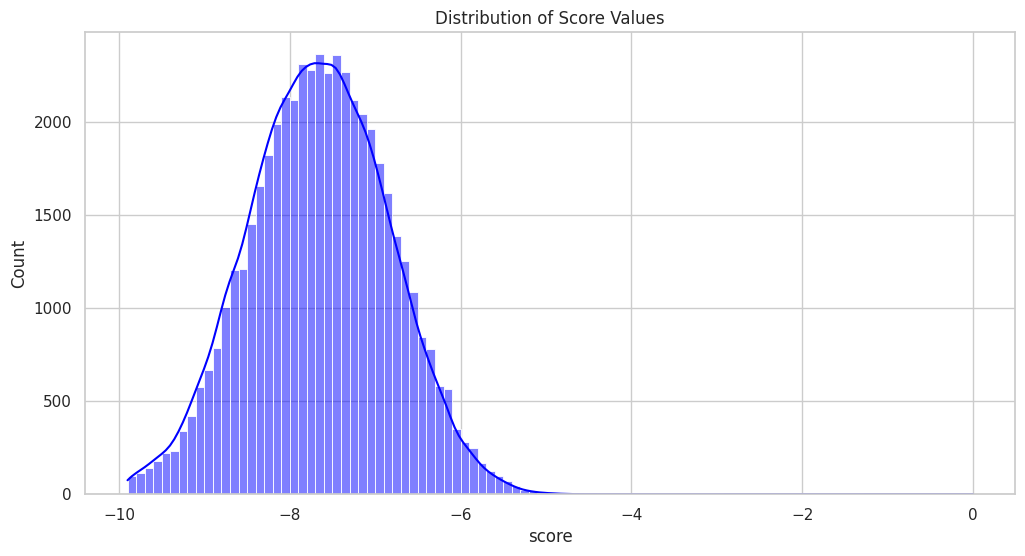

In [ ]:
df = pd.read_csv('/content/molpal/data/Enamine50k_scores.csv.gz')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['score'], kde=True, color='blue', binwidth=0.1)
plt.title('Distribution of Score Values')
plt.xlabel('score')
plt.ylabel('Count')
plt.show()

## Creation of the top 1% database

In [ ]:
df = pd.read_csv('/content/molpal/data/Enamine50k_scores.csv.gz')

df_sorted = df.sort_values(by='score', ascending=True)

percentile_index = int(len(df_sorted) * 0.01)

top_1per_df = df_sorted.iloc[:percentile_index]

top_1per_df.reset_index(drop=True, inplace=True)

top_1per_df.to_csv('/content/molpal/data/top_1per_scores.csv', index=True)

top_1per_df

,smiles,score
0,O=C(NCCc1nnc2n1CCCCC2)NC1CCc2ccccc2C1,-9.9
1,O=C(Cc1ccc2ccccc2c1)NC(CN1CCCC1=O)c1ccccc1,-9.9
2,O=C(N1CCCC1)N1CCCC(c2nc(-c3ccc4ccccc4c3)no2)C1,-9.9
3,COc1ccccc1-c1cccc(NC(=O)N2CC(S(=O)(=O)c3ccccc3...,-9.9
4,O=C1NCCCCC1Cc1nc(-c2cccc(CN3CCCC3=O)c2)no1,-9.9
...,...,...
492,O=C1CCCN1CC1CCCCN1C(=O)C1CCN(C(=O)c2ccccc2)CC1,-9.6
493,O=C(NC1CCCN(Cc2nnc3n2CCCC3)C1)c1ccc2ccccc2c1,-9.6
494,O=C(N[C@H](C(=O)O)c1ccccc1)C1CCCN(C(=O)Cc2ccc(...,-9.6
495,Cc1ccc(C(=O)N2CCC(NC(=O)COc3ccc(N4CCCC4=O)cc3)...,-9.6


In [ ]:
%cd /content/molpal

!mkdir folder_output

/content/molpal
mkdir: cannot create directory ‘folder_output’: File exists


In [ ]:
%cd /content/molpal/folder_output

/content/molpal/folder_output


## creation of the fingerprints

In [ ]:
!python /content/molpal/scripts/fingerprints.py -o fps_file --library /content/molpal/data/Enamine50k_smiles.csv.gz  \
--fingerprint pair --length 2048 --radius 2

2024-05-29 21:59:43,343	INFO worker.py:1740 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
Precalculating fps:   0% 0/65536 [00:00<?, ?batch/s]
Calculating fingerprints:   0% 0/195 [00:00<?, ?chunk/s]
Precalculating fps: 100% 65536/65536 [00:05<00:00, 11782.59batch/s]
Done!
Feature matrix was saved to "fps_file.h5"
When using this fingerprints file, you should add "--fps fps_file.h5 --invalid-lines " to the command line or the config file to speed up pool construction


In [ ]:
import os

output_file = "fps_file.h5"
if os.path.exists(output_file):
    print("The file exists.")
else:
    print("The file does not exist.")

The file exists.


In [ ]:
%pwd

'/content/molpal/folder_output'

# Merging the datasets

In [ ]:
import csv
import gzip
import h5py
import numpy as np

def create_combined_csv(smiles_csv_gz_file, fps_h5_file, output_csv_file):
    # Read smiles and scores from the compressed CSV file
    with gzip.open(smiles_csv_gz_file, 'rt') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  # Read the headers
        if headers != ['smiles', 'score']:
            print("Error: Incorrect headers. The headers must be 'smiles' and 'score'.")
            return
        smiles_scores = [(row[0], row[1]) for row in reader]

    # Read fingerprints from the HDF5 file
    with h5py.File(fps_h5_file, 'r') as h5file:
        fps = h5file['fps'][:]

    # Check if the number of smiles matches the number of fingerprints
    if len(smiles_scores) != len(fps):
        print("Error: Number of smiles and fingerprints don't match")
        return

    # Combine smiles, fps, and scores into a list of rows
    combined_data = [(smiles, *fps_values, score) for (smiles, score), fps_values in zip(smiles_scores, fps)]

    # Write the combined data to a new CSV file
    with open(output_csv_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Smiles'] + [f'FP{i}' for i in range(len(fps[0]))] + ['Score'])
        writer.writerows(combined_data)

    # Usage example
smiles_score = '/content/molpal/data/Enamine50k_scores.csv.gz'
fps = '/content/molpal/folder_output/fps_file.h5'
create_combined_csv(smiles_score, fps, '/content/molpal/folder_output/smiles_fps_score.csv')

In [ ]:
%pwd

'/content/molpal/folder_output'

# Creating a plot for each of the molecules probes at each of the iterations and an overlap of all the probing iterations

['/content/molpal/data/beta_50k/top_500_explored_iter_0_beta_4.csv', '/content/molpal/data/beta_50k/top_724_explored_iter_1_beta_4.csv', '/content/molpal/data/beta_50k/top_948_explored_iter_2_beta_4.csv', '/content/molpal/data/beta_50k/top_1171_explored_iter_3_beta_4.csv', '/content/molpal/data/beta_50k/top_1395_explored_iter_4_beta_4.csv', '/content/molpal/data/beta_50k/top_1619_explored_iter_5_beta_4.csv', '/content/molpal/data/beta_50k/top_1843_explored_iter_6_beta_4.csv', '/content/molpal/data/beta_50k/top_2067_explored_iter_7_beta_4.csv', '/content/molpal/data/beta_50k/top_2291_explored_iter_8_beta_4.csv', '/content/molpal/data/beta_50k/top_2515_explored_iter_9_beta_4.csv', '/content/molpal/data/beta_50k/top_2739_explored_iter_10_beta_4.csv', '/content/molpal/data/beta_50k/top_2963_explored_iter_11_beta_4.csv']


<ipython-input-26-1007f7f07e69>:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', len(dataset_paths))
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


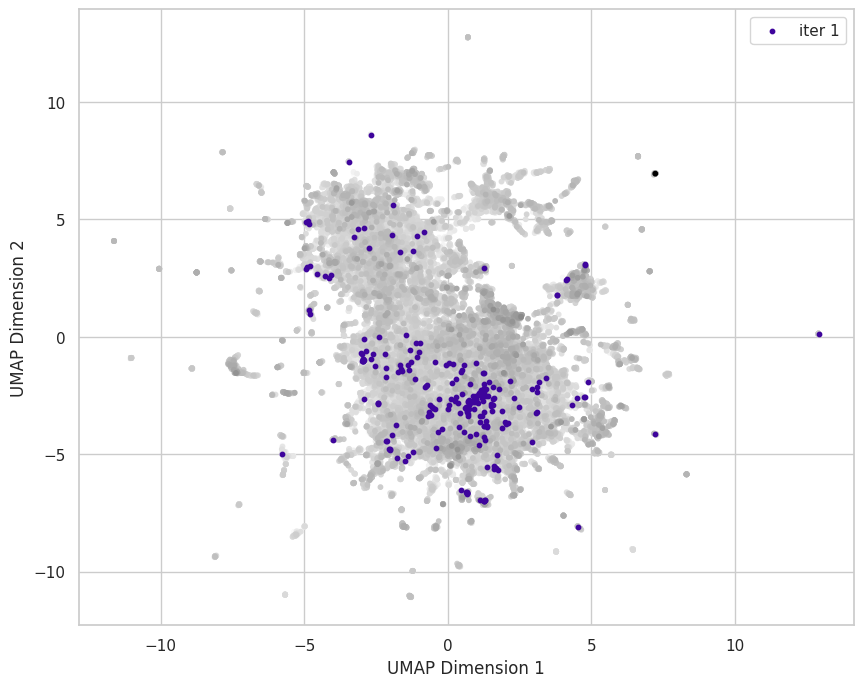

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


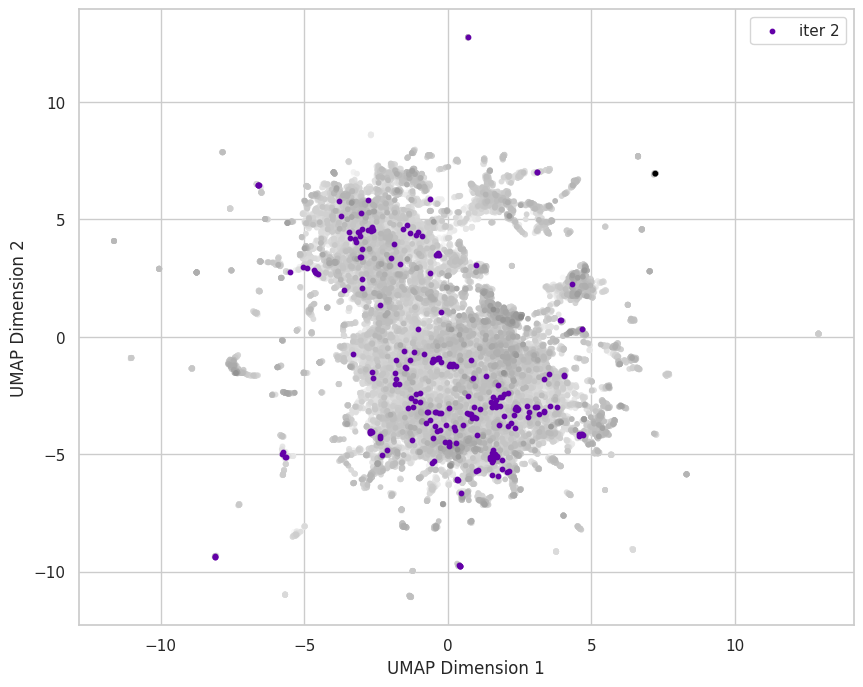

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


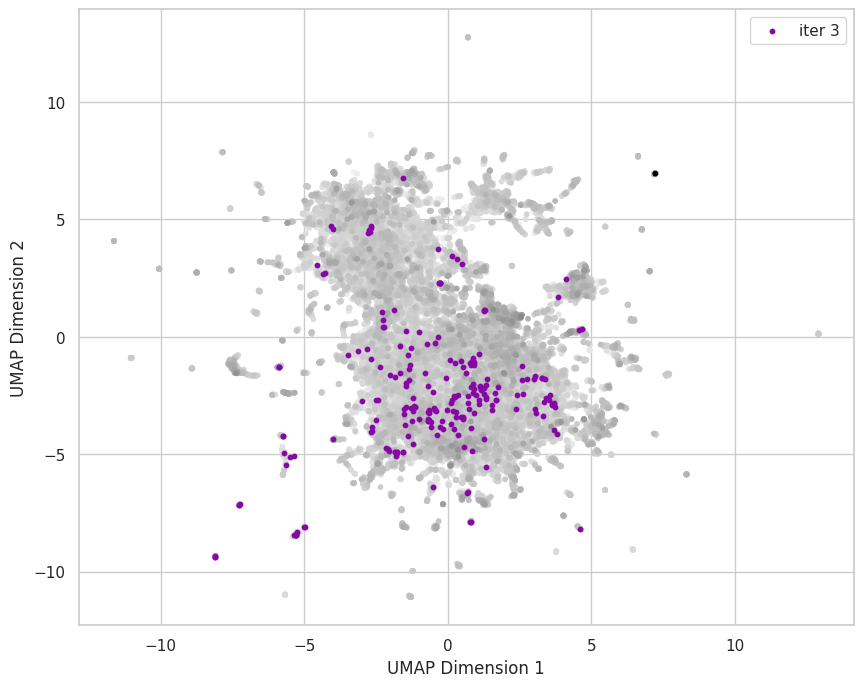

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


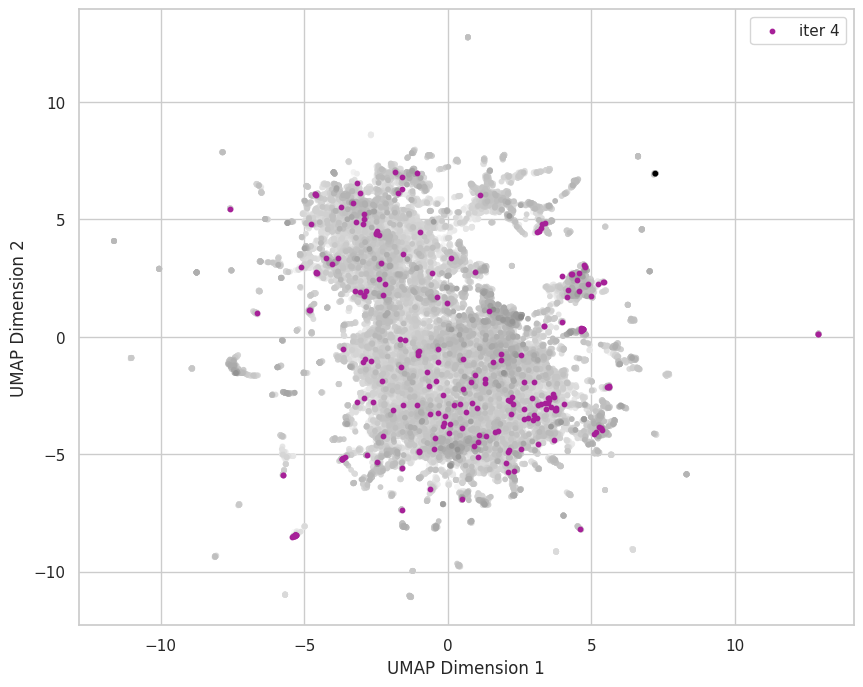

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


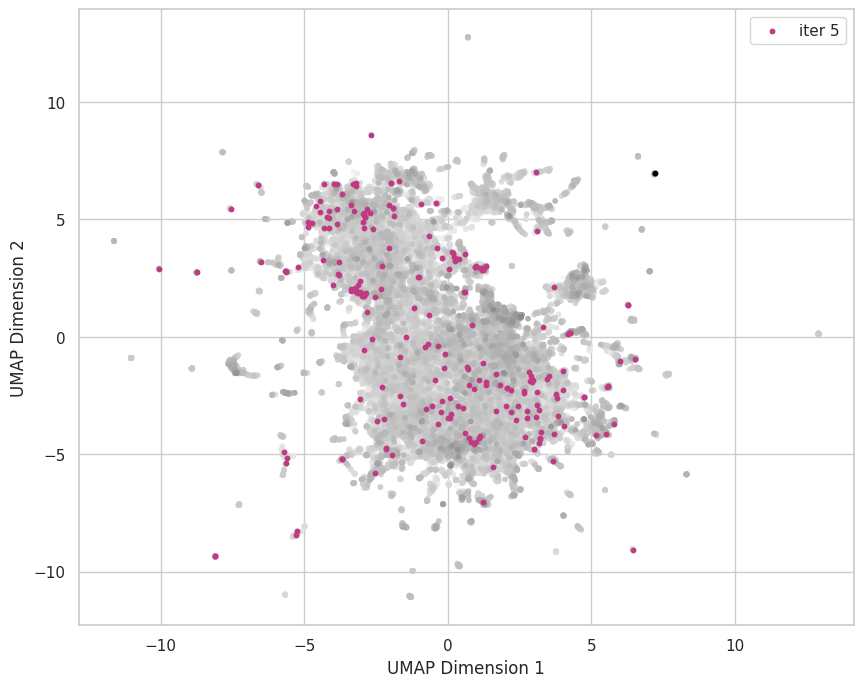

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


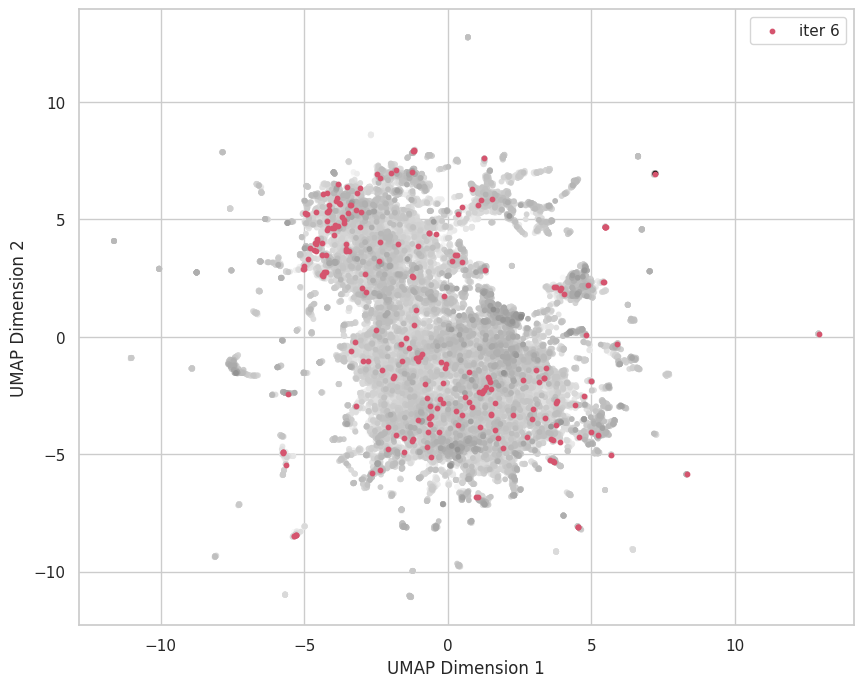

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


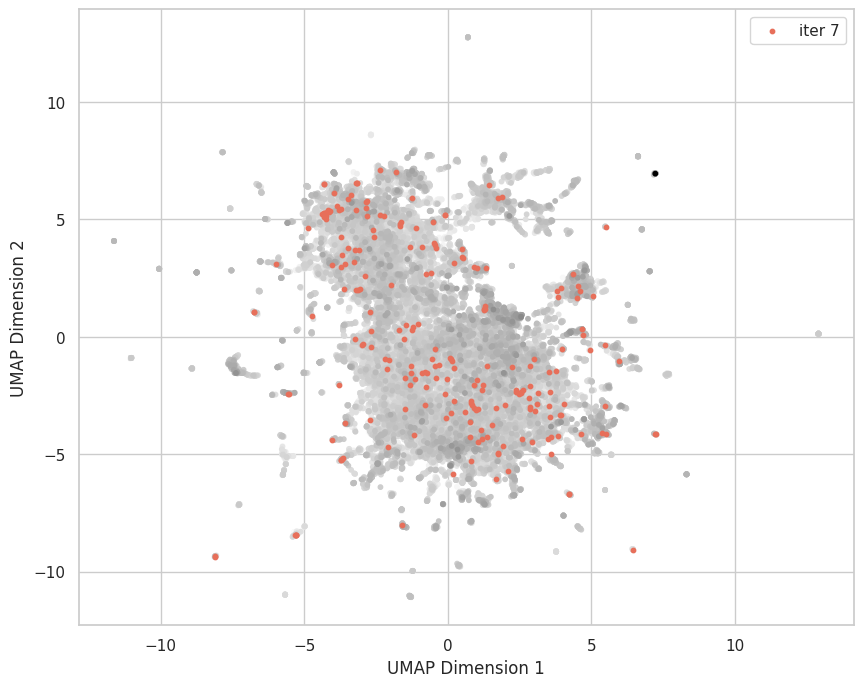

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


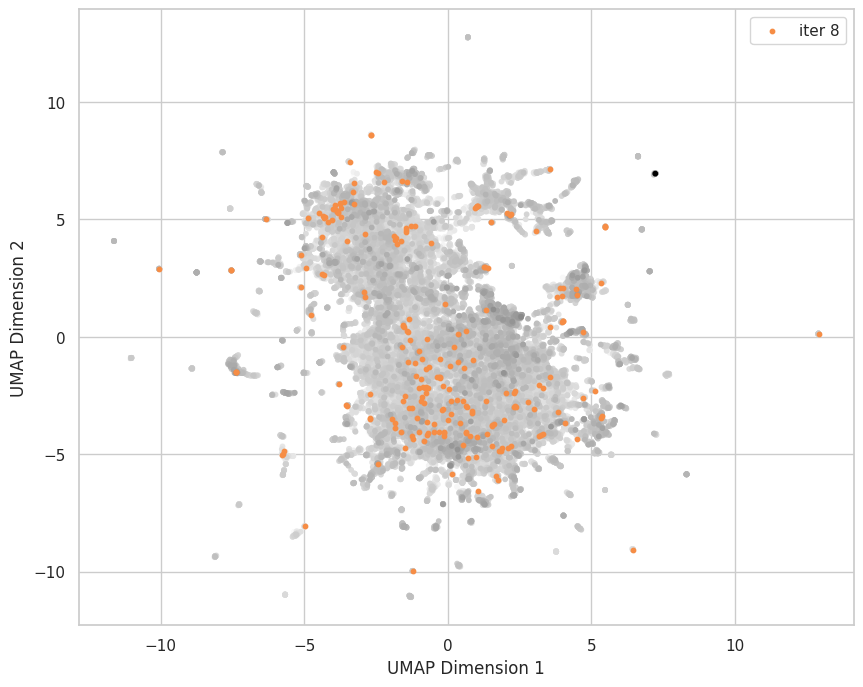

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


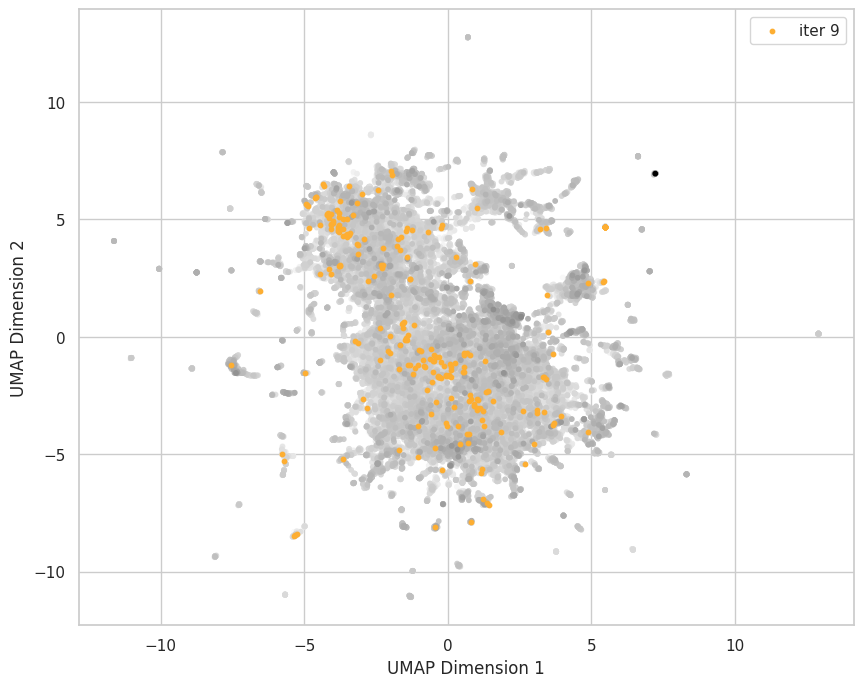

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


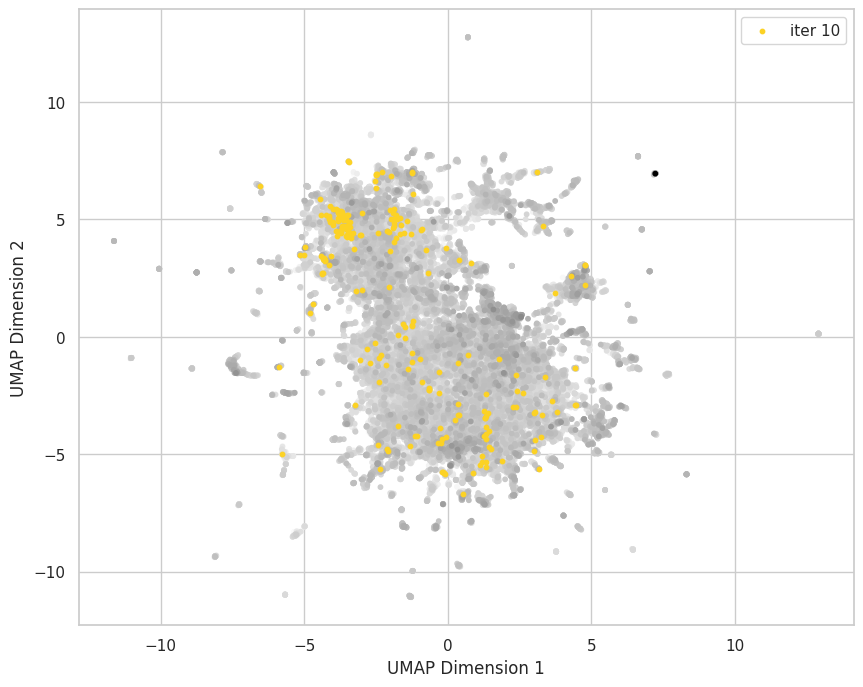

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


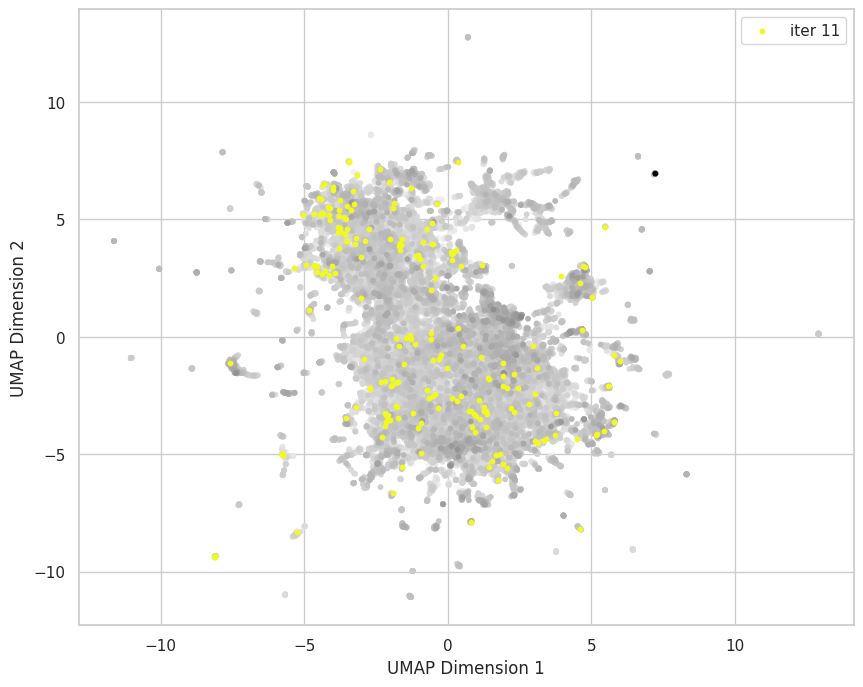

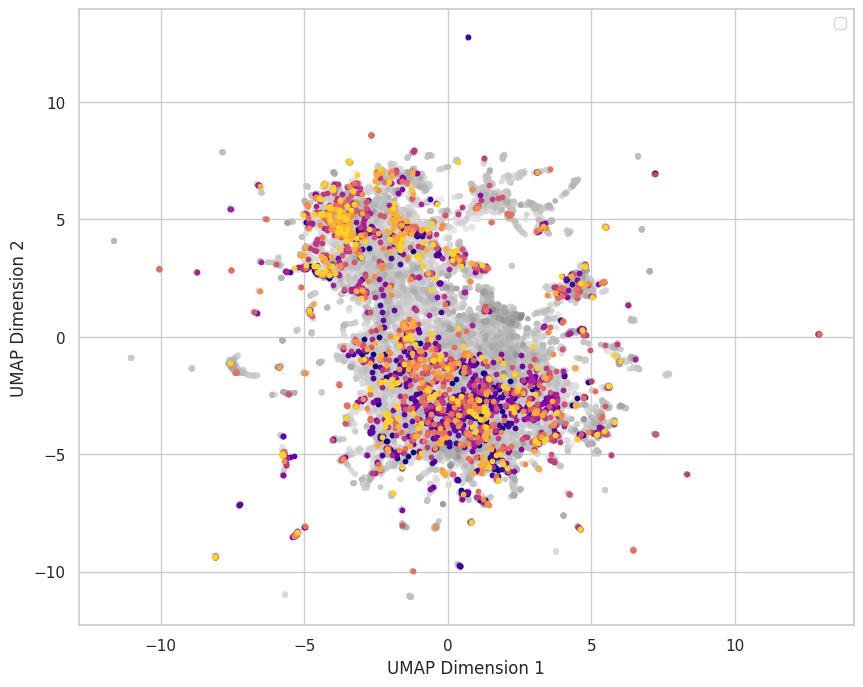

In [ ]:
import os
import pandas as pd
import umap
import matplotlib.pyplot as plt
from rdkit import Chem
import glob
from matplotlib import cm
import re
import rdkit

def smiles_difference(dataset1_path, dataset2_path, output_path):
    df1 = pd.read_csv(dataset1_path)
    df2 = pd.read_csv(dataset2_path)

    df1.rename(columns={df1.columns[0]: 'smiles'}, inplace=True)
    df2.rename(columns={df2.columns[0]: 'smiles'}, inplace=True)

    df1['Mol'] = df1['smiles'].apply(Chem.MolFromSmiles)
    df2['Mol'] = df2['smiles'].apply(Chem.MolFromSmiles)

    df1['Canonical_SMILES'] = df1['Mol'].apply(Chem.MolToSmiles)
    df2['Canonical_SMILES'] = df2['Mol'].apply(Chem.MolToSmiles)

    common_smiles = set(df1['Canonical_SMILES']).intersection(set(df2['Canonical_SMILES']))

    df2_unique = df2[~df2['Canonical_SMILES'].isin(common_smiles)]

    df2_unique = df2_unique.drop(columns=['Mol', 'Canonical_SMILES'])

    df2_unique.to_csv(output_path, index=False)

def umap_visualization(csv_file, csv_explore):
    data = pd.read_csv(csv_file)
    explore = pd.read_csv(csv_explore)

    data_smiles = set(data['Smiles'])
    explore_smiles = set(explore['smiles'])
    common_smiles = data_smiles.intersection(explore_smiles)

    common_data = data[data['Smiles'].isin(common_smiles)]

    fingerprint_cols = [col for col in data.columns if 'FP' in col]
    common_fingerprint_cols = [col for col in common_data.columns if 'FP' in col]

    score_col = data.columns[-1]
    common_score_col = common_data.columns[-1]

    features = data[fingerprint_cols].values
    common_features = common_data[common_fingerprint_cols].values
    labels = data[score_col].values
    common_labels = common_data[common_score_col].values

    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(features)
    embedding_2 = reducer.transform(common_features)

    return embedding, embedding_2, labels

base_path = "/content/molpal/data/beta_50k/"
dataset_paths = glob.glob(os.path.join(base_path, "top_*_explored_iter_*_beta_4.csv"))

def extract_num(path):
    match = re.search(r'top_(\d+)_explored_iter_(\d+)_beta_4', path)
    return int(match.group(2)), int(match.group(1))

dataset_paths = sorted(dataset_paths, key=extract_num)
print(dataset_paths)

og_database = '/content/molpal/folder_output/smiles_fps_score.csv'

cmap = cm.get_cmap('plasma', len(dataset_paths))

all_embeddings = []
all_labels = []

for i in range(1, len(dataset_paths)):
    dataset1_path = dataset_paths[i-1]
    dataset2_path = dataset_paths[i]
    output_path = f'unique_dataset_{i}.csv'

    smiles_difference(dataset1_path, dataset2_path, output_path)

    embedding, embedding_2, labels = umap_visualization(og_database, output_path)

    all_embeddings.append(embedding_2)
    all_labels.append(labels)

    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Greys', s=10, vmin=min(labels), vmax=max(labels))
    plt.scatter(embedding_2[:, 0], embedding_2[:, 1], color=cmap(i), s=10, label=f'iter {i}')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')

    plt.legend()
    plt.savefig(f'umap_beta_4_iter_{i}.png')
    plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Greys', s=10, vmin=min(labels), vmax=max(labels))
for i, c_embedding in enumerate(all_embeddings):
    plt.scatter(c_embedding[:, 0], c_embedding[:, 1], color=cmap(i), s=10)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
#plt.title('UMAP Visualization for All Unique Datasets')
plt.legend()
plt.savefig('umap_beta_4_all_iter.png')
plt.show()
